In [1]:
#
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Getting the Data

In [2]:
test_df = pd.read_excel("Test_set.xlsx")
train_df = pd.read_excel("Data_train.xlsx")

# Data Analysis

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
train_df.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [6]:
train_df.shape

(10683, 11)

In [7]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_df.dropna(inplace=True)

In [9]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_df.shape

(10682, 11)

In [11]:
train_df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
35h 20m      1
33h 20m      1
36h 25m      1
5m           1
30h 10m      1
Name: Duration, Length: 368, dtype: int64

In [12]:
train_df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

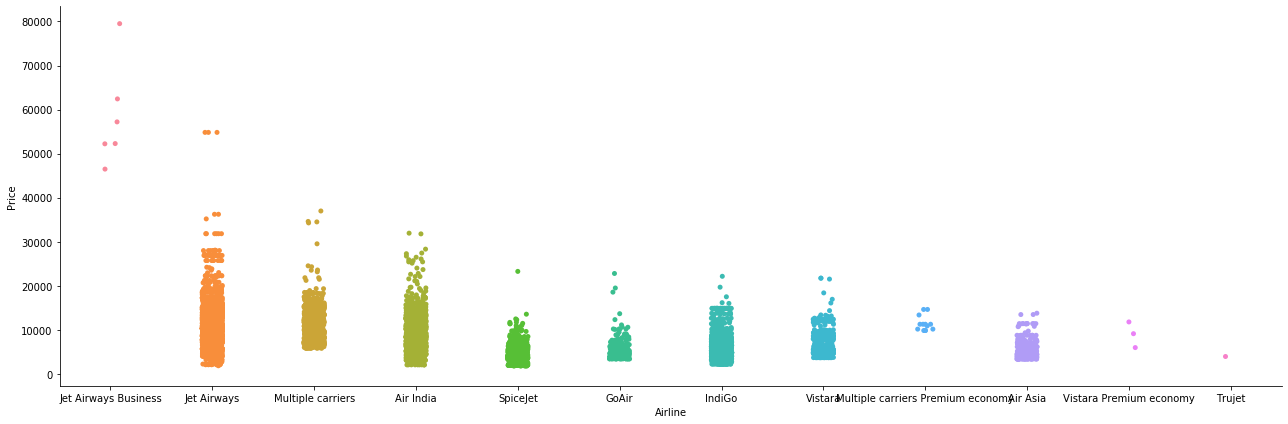

In [13]:
sns.catplot(y="Price",x="Airline",data=train_df.sort_values("Price",ascending=False),height=6,aspect=3)

In [14]:
Airline = train_df[["Airline"]]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [15]:
train_df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

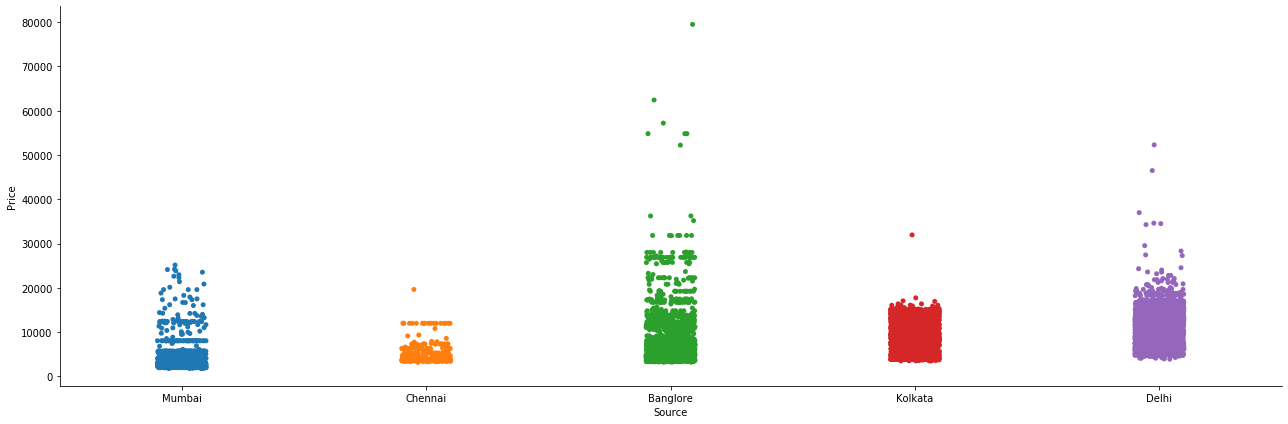

In [16]:
sns.catplot(y="Price",x="Source",data = train_df.sort_values("Price",ascending=True),height=6,aspect=3)

In [17]:
Source = train_df[["Source"]]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [18]:
train_df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [19]:
Destination = train_df[["Destination"]]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [20]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [21]:
train_df["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [22]:
train_df["Total_Stops"]

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [23]:
train_df.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [24]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


In [25]:
train_df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [26]:
train_df.replace({"non-stop" : 0 , "1 stop" : 1 , "2 stops" : 2 , "3 stops" : 3 , "4 stops" : 4},inplace=True)

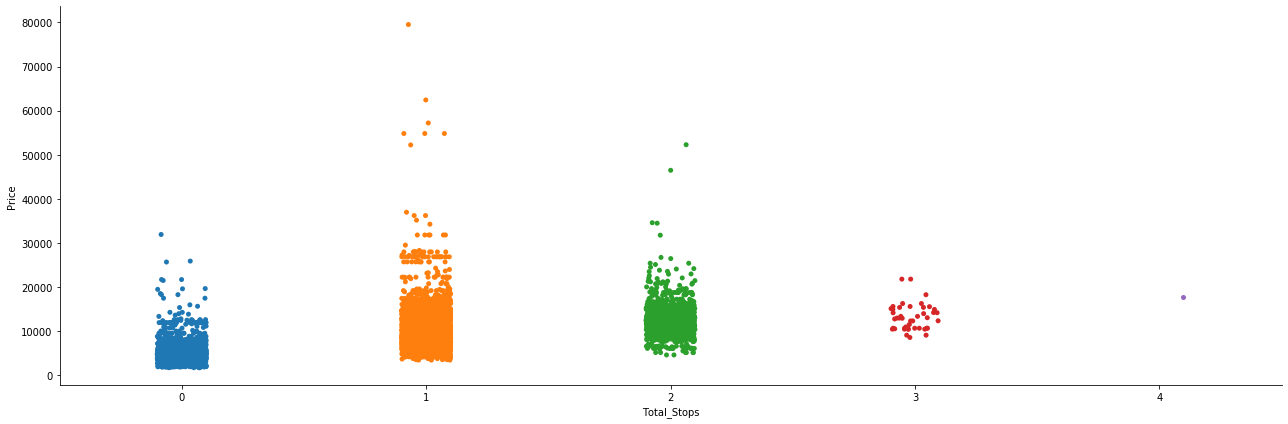

In [27]:
sns.catplot(y="Price",x="Total_Stops",data = train_df.sort_values("Price",ascending=True),height=6,aspect=3)

In [28]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302


In [29]:
train_df=pd.concat([train_df,Airline,Source,Destination],axis=1)

In [30]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,3897,0,...,0,0,0,0,0,0,0,0,0,1
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662,1,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882,0,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218,0,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
train_df.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [32]:
train_df.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,0,3897,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,05:50,13:15,7h 25m,2,7662,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,9/06/2019,09:25,04:25 10 Jun,19h,2,13882,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,12/05/2019,18:05,23:30,5h 25m,1,6218,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,01/03/2019,16:50,21:35,4h 45m,1,13302,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
train_df["Date"] = pd.to_datetime(train_df.Date_of_Journey,format="%d/%m/%Y").dt.day

In [34]:
train_df["Date"]

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Date, Length: 10682, dtype: int64

In [35]:
train_df["Month"] = pd.to_datetime(train_df.Date_of_Journey,format="%d/%m/%Y").dt.month

In [36]:
train_df["Month"]

0        3
1        5
2        6
3        5
4        3
        ..
10678    4
10679    4
10680    4
10681    3
10682    5
Name: Month, Length: 10682, dtype: int64

In [37]:
train_df.drop(["Date_of_Journey"],axis=1,inplace=True)

In [38]:
train_df.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Date,Month
0,22:20,01:10 22 Mar,2h 50m,0,3897,0,0,1,0,0,...,0,0,0,0,0,0,0,1,24,3
1,05:50,13:15,7h 25m,2,7662,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,5
2,09:25,04:25 10 Jun,19h,2,13882,0,0,0,1,0,...,1,0,0,1,0,0,0,0,9,6
3,18:05,23:30,5h 25m,1,6218,0,0,1,0,0,...,0,1,0,0,0,0,0,0,12,5
4,16:50,21:35,4h 45m,1,13302,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,3


In [39]:
train_df.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Date,Month
0,22:20,01:10 22 Mar,2h 50m,0,3897,0,0,1,0,0,...,0,0,0,0,0,0,0,1,24,3
1,05:50,13:15,7h 25m,2,7662,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,5
2,09:25,04:25 10 Jun,19h,2,13882,0,0,0,1,0,...,1,0,0,1,0,0,0,0,9,6
3,18:05,23:30,5h 25m,1,6218,0,0,1,0,0,...,0,1,0,0,0,0,0,0,12,5
4,16:50,21:35,4h 45m,1,13302,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,3


In [40]:
train_df["Dep_hour"]=pd.to_datetime(train_df["Dep_Time"]).dt.hour

train_df["Dep_min"]=pd.to_datetime(train_df["Dep_Time"]).dt.minute

train_df.drop(["Dep_Time"],axis=1,inplace=True)

In [41]:
train_df.head()

,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Date,Month,Dep_hour,Dep_min
0,01:10 22 Mar,2h 50m,0,3897,0,0,1,0,0,0,...,0,0,0,0,0,1,24,3,22,20
1,13:15,7h 25m,2,7662,1,0,0,0,0,0,...,0,0,0,0,0,0,1,5,5,50
2,04:25 10 Jun,19h,2,13882,0,0,0,1,0,0,...,0,1,0,0,0,0,9,6,9,25
3,23:30,5h 25m,1,6218,0,0,1,0,0,0,...,0,0,0,0,0,0,12,5,18,5
4,21:35,4h 45m,1,13302,0,0,1,0,0,0,...,0,0,0,0,0,1,1,3,16,50


In [42]:
train_df["Arrival_hour"]=pd.to_datetime(train_df["Arrival_Time"]).dt.hour

train_df["Arrival_min"]=pd.to_datetime(train_df["Arrival_Time"]).dt.minute

train_df.drop(["Arrival_Time"],axis=1,inplace=True)


In [43]:
train_df.head()

,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,2h 50m,0,3897,0,0,1,0,0,0,0,...,0,0,0,1,24,3,22,20,1,10
1,7h 25m,2,7662,1,0,0,0,0,0,0,...,0,0,0,0,1,5,5,50,13,15
2,19h,2,13882,0,0,0,1,0,0,0,...,0,0,0,0,9,6,9,25,4,25
3,5h 25m,1,6218,0,0,1,0,0,0,0,...,0,0,0,0,12,5,18,5,23,30
4,4h 45m,1,13302,0,0,1,0,0,0,0,...,0,0,0,1,1,3,16,50,21,35


In [44]:
duration = list(train_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i]="0h " + duration[i]
            
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [45]:
train_df["Duration_hours"]=duration_hours
train_df["Duration_mins"]=duration_mins

In [46]:
train_df.head()

,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Destination_Kolkata,Destination_New Delhi,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,2h 50m,0,3897,0,0,1,0,0,0,0,...,0,1,24,3,22,20,1,10,2,50
1,7h 25m,2,7662,1,0,0,0,0,0,0,...,0,0,1,5,5,50,13,15,7,25
2,19h,2,13882,0,0,0,1,0,0,0,...,0,0,9,6,9,25,4,25,19,0
3,5h 25m,1,6218,0,0,1,0,0,0,0,...,0,0,12,5,18,5,23,30,5,25
4,4h 45m,1,13302,0,0,1,0,0,0,0,...,0,1,1,3,16,50,21,35,4,45


In [47]:
train_df.head()

,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Destination_Kolkata,Destination_New Delhi,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,2h 50m,0,3897,0,0,1,0,0,0,0,...,0,1,24,3,22,20,1,10,2,50
1,7h 25m,2,7662,1,0,0,0,0,0,0,...,0,0,1,5,5,50,13,15,7,25
2,19h,2,13882,0,0,0,1,0,0,0,...,0,0,9,6,9,25,4,25,19,0
3,5h 25m,1,6218,0,0,1,0,0,0,0,...,0,0,12,5,18,5,23,30,5,25
4,4h 45m,1,13302,0,0,1,0,0,0,0,...,0,1,1,3,16,50,21,35,4,45


In [48]:
train_df.drop(["Duration"],axis=1,inplace=True)

In [49]:
train_df.head()

,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Destination_Kolkata,Destination_New Delhi,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0,3897,0,0,1,0,0,0,0,0,...,0,1,24,3,22,20,1,10,2,50
1,2,7662,1,0,0,0,0,0,0,0,...,0,0,1,5,5,50,13,15,7,25
2,2,13882,0,0,0,1,0,0,0,0,...,0,0,9,6,9,25,4,25,19,0
3,1,6218,0,0,1,0,0,0,0,0,...,0,0,12,5,18,5,23,30,5,25
4,1,13302,0,0,1,0,0,0,0,0,...,0,1,1,3,16,50,21,35,4,45


# Test Set

In [50]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [51]:
test_df.shape

(2671, 10)

In [52]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


In [53]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [54]:
test_df["Airline"].value_counts()


Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In [55]:
Airline = test_df[["Airline"]]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [56]:
test_df["Source"].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [57]:
Source = test_df[["Source"]]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [58]:
test_df["Destination"].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [59]:
Destination = test_df[["Destination"]]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [60]:
test_df=pd.concat([test_df,Airline,Source,Destination],axis=1)

test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,...,0,0,1,0,0,1,0,0,0,0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,...,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,...,0,0,1,0,0,1,0,0,0,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,...,0,0,0,0,0,0,1,0,0,0


In [61]:
test_df.drop(["Airline","Source","Destination"],axis=1,inplace=True)

test_df.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,6/06/2019,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,12/05/2019,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,21/05/2019,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,21/05/2019,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,24/06/2019,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [62]:
test_df.drop(["Route","Additional_Info"],axis=1,inplace=True)

test_df.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,6/06/2019,17:30,04:25 07 Jun,10h 55m,1 stop,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1,12/05/2019,06:20,10:20,4h,1 stop,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,21/05/2019,19:15,19:00 22 May,23h 45m,1 stop,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,21/05/2019,08:00,21:00,13h,1 stop,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,24/06/2019,23:55,02:45 25 Jun,2h 50m,non-stop,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [63]:
test_df["Total_Stops"].value_counts()
test_df.replace({"non-stop" : 0 , "1 stop" : 1 , "2 stops" : 2 , "3 stops" : 3 , "4 stops" : 4},inplace=True)

test_df.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,6/06/2019,17:30,04:25 07 Jun,10h 55m,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1,12/05/2019,06:20,10:20,4h,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,21/05/2019,19:15,19:00 22 May,23h 45m,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,21/05/2019,08:00,21:00,13h,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,24/06/2019,23:55,02:45 25 Jun,2h 50m,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [64]:
test_df["Date"] = pd.to_datetime(test_df.Date_of_Journey,format="%d/%m/%Y").dt.day
test_df["Month"] = pd.to_datetime(test_df.Date_of_Journey,format="%d/%m/%Y").dt.month
test_df.drop(["Date_of_Journey"],axis=1,inplace=True)

test_df.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Date,Month
0,17:30,04:25 07 Jun,10h 55m,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,6,6
1,06:20,10:20,4h,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,12,5
2,19:15,19:00 22 May,23h 45m,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,21,5
3,08:00,21:00,13h,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,21,5
4,23:55,02:45 25 Jun,2h 50m,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,24,6


In [65]:
test_df["Dep_hour"]=pd.to_datetime(test_df["Dep_Time"]).dt.hour
test_df["Dep_min"]=pd.to_datetime(test_df["Dep_Time"]).dt.minute
test_df.drop(["Dep_Time"],axis=1,inplace=True)

test_df.head()

,Arrival_Time,Duration,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Date,Month,Dep_hour,Dep_min
0,04:25 07 Jun,10h 55m,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,6,6,17,30
1,10:20,4h,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,12,5,6,20
2,19:00 22 May,23h 45m,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,21,5,19,15
3,21:00,13h,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,21,5,8,0
4,02:45 25 Jun,2h 50m,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,24,6,23,55


In [66]:
test_df["Arrival_hour"]=pd.to_datetime(test_df["Arrival_Time"]).dt.hour
test_df["Arrival_min"]=pd.to_datetime(test_df["Arrival_Time"]).dt.minute
test_df.drop(["Arrival_Time"],axis=1,inplace=True)

test_df.head()

,Duration,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,10h 55m,1,0,0,0,1,0,0,0,0,...,0,0,0,0,6,6,17,30,4,25
1,4h,1,0,0,1,0,0,0,0,0,...,0,0,0,0,12,5,6,20,10,20
2,23h 45m,1,0,0,0,1,0,0,0,0,...,0,0,0,0,21,5,19,15,19,0
3,13h,1,0,0,0,0,0,1,0,0,...,0,0,0,0,21,5,8,0,21,0
4,2h 50m,0,0,0,0,0,0,0,0,0,...,1,0,0,0,24,6,23,55,2,45


In [67]:
duration = list(test_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i]="0h " + duration[i]
            
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))
    
    
test_df["Duration_hours"]=duration_hours
test_df["Duration_mins"]=duration_mins

test_df.drop(["Duration"],axis=1,inplace=True)

test_df.head()

,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,...,Destination_Kolkata,Destination_New Delhi,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,1,0,0,0,1,0,0,0,0,0,...,0,0,6,6,17,30,4,25,10,55
1,1,0,0,1,0,0,0,0,0,0,...,0,0,12,5,6,20,10,20,4,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,21,5,19,15,19,0,23,45
3,1,0,0,0,0,0,1,0,0,0,...,0,0,21,5,8,0,21,0,13,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,24,6,23,55,2,45,2,50


In [68]:
train_df.shape

(10682, 30)

In [69]:
train_df.columns

Index(['Total_Stops', 'Price', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Date', 'Month',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [70]:
X = train_df.loc[:, ['Total_Stops','Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Date', 'Month',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins']]

In [71]:
X.head()

,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Destination_Kolkata,Destination_New Delhi,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0,0,0,1,0,0,0,0,0,0,...,0,1,24,3,22,20,1,10,2,50
1,2,1,0,0,0,0,0,0,0,0,...,0,0,1,5,5,50,13,15,7,25
2,2,0,0,0,1,0,0,0,0,0,...,0,0,9,6,9,25,4,25,19,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,12,5,18,5,23,30,5,25
4,1,0,0,1,0,0,0,0,0,0,...,0,1,1,3,16,50,21,35,4,45


In [72]:
Y = train_df.iloc[:, 1]
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

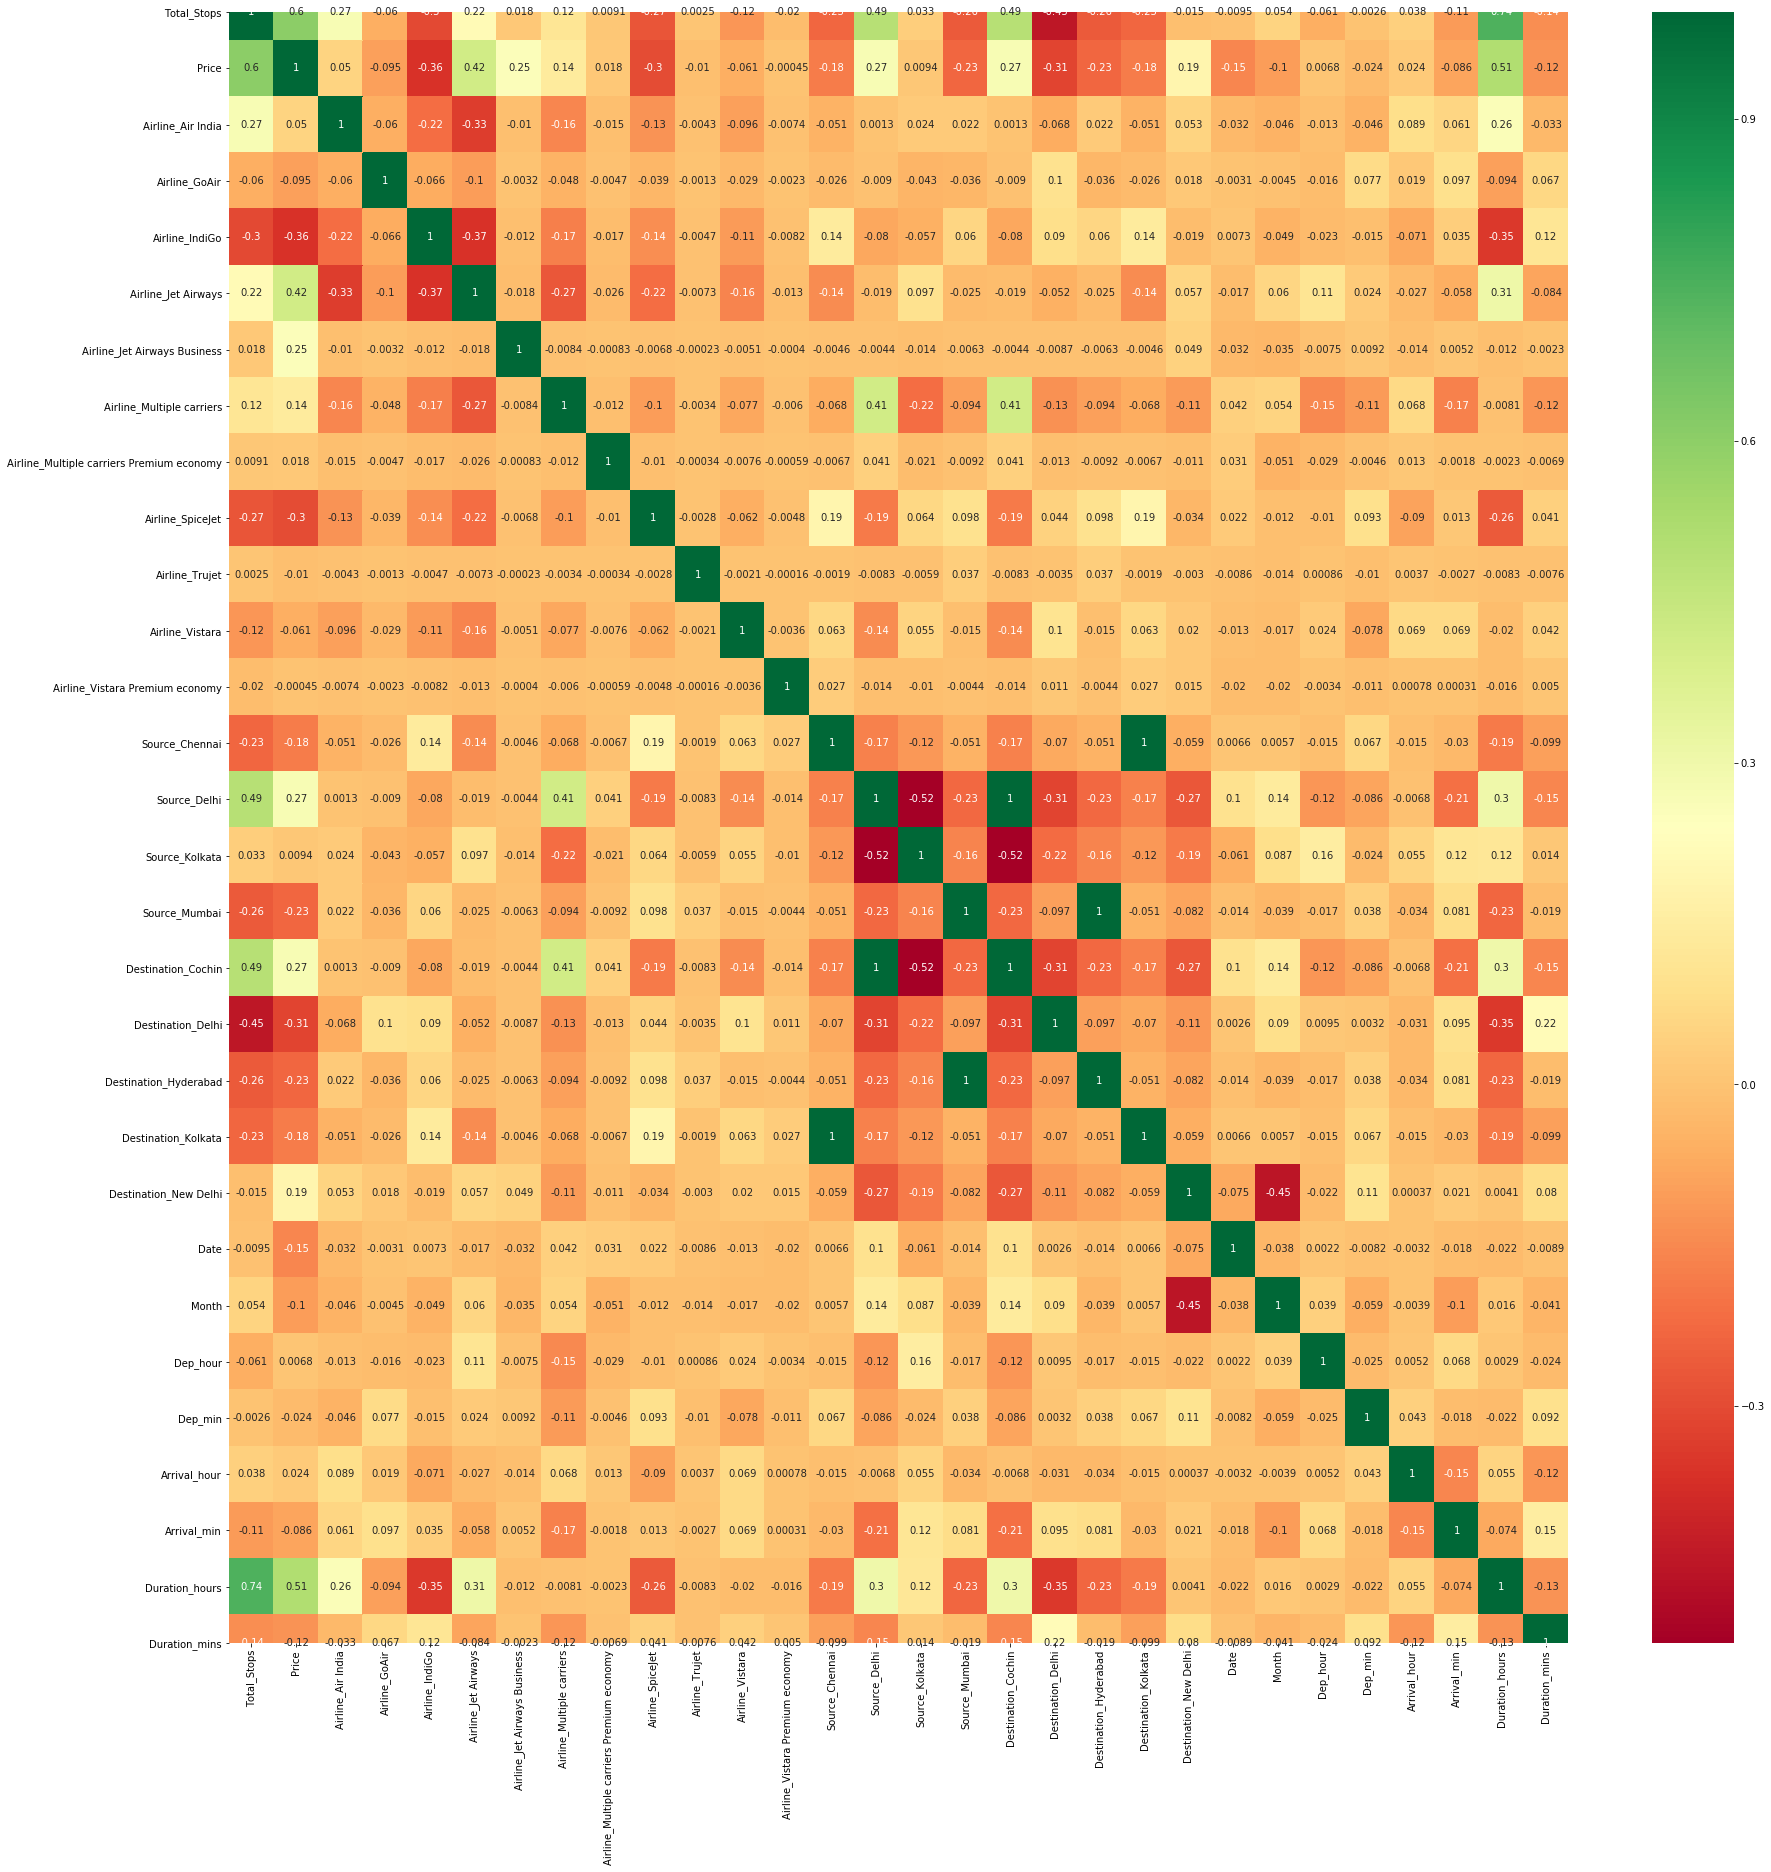

In [73]:
plt.figure(figsize=(30,30))
sns.heatmap(train_df.corr(),annot=True,cmap= "RdYlGn")

plt.show()

# Buliding Model

In [74]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2 , random_state=12)

Random Forest

In [75]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train, Y_train)

C:\Users\majay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [76]:
Y_predication = random_forest.predict(X_test)

In [77]:
acc_random_forest = random_forest.score(X_train,Y_train)
acc_random_forest

0.9482247369171043

 Logistic Regression

In [78]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)



C:\Users\majay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\majay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [79]:
acc_log = logreg.score(X_train,Y_train)
acc_log

0.4050321825629023

KNN

In [80]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)


In [81]:
acc_knn = knn.score(X_train,Y_train)
acc_knn

0.5232299590403745

Linear SVC

In [82]:
linear_svc = SVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

C:\Users\majay\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [83]:
acc_linear_svc = linear_svc.score(X_train,Y_train)
acc_linear_svc

0.5616149795201872

In [84]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)


In [85]:
acc_decision_tree = decision_tree.score(X_train,Y_train)
acc_decision_tree

0.8825043885313049

# which is the best model?

In [86]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest',
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_log, acc_knn,
              acc_random_forest,  acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.948225,Random Forest
0.882504,Decision Tree
0.561615,Support Vector Machines
0.523230,Logistic Regression
0.405032,KNN


Random Forest

What is Random Forest ?

Random Forest is a supervised learning algorithm. Like you can already see from it’s name, it creates a forest and makes it somehow random. The "forest“ it builds, is an ensemble of Decision Trees, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

To say it in simple words: Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

One big advantage of random forest is, that it can be used for both classification and regression problems, which form the majority of current machine learning systems. With a few exceptions a random-forest classifier has all the hyperparameters of a decision-tree classifier and also all the hyperparameters of a bagging classifier, to control the ensemble itself.

The random-forest algorithm brings extra randomness into the model, when it is growing the trees. Instead of searching for the best feature while splitting a node, it searches for the best feature among a random subset of features. This process creates a wide diversity, which generally results in a better model. Therefore when you are growing a tree in random forest, only a random subset of the features is considered for splitting a node. You can even make trees more random, by using random thresholds on top of it, for each feature rather than searching for the best possible thresholds (like a normal decision tree does).

## Feature Importance

In [87]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [88]:
importances.head(15)

,importance
feature,
Duration_hours,0.453
Date,0.142
Month,0.062
Airline_Jet Airways,0.059
Airline_Jet Airways Business,0.042
Arrival_hour,0.037
Total_Stops,0.035
Dep_hour,0.027
Destination_New Delhi,0.026


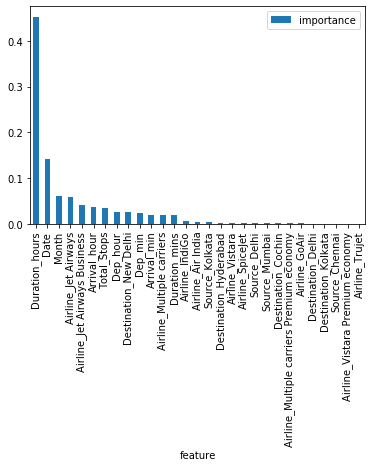

In [89]:
importances.plot.bar()

Conclusion :

In [90]:
train_df.head()

,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Destination_Kolkata,Destination_New Delhi,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0,3897,0,0,1,0,0,0,0,0,...,0,1,24,3,22,20,1,10,2,50
1,2,7662,1,0,0,0,0,0,0,0,...,0,0,1,5,5,50,13,15,7,25
2,2,13882,0,0,0,1,0,0,0,0,...,0,0,9,6,9,25,4,25,19,0
3,1,6218,0,0,1,0,0,0,0,0,...,0,0,12,5,18,5,23,30,5,25
4,1,13302,0,0,1,0,0,0,0,0,...,0,1,1,3,16,50,21,35,4,45


train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

Training Random Forest again

In [94]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = random_forest.score(X_train, Y_train)

acc_random_forest

C:\Users\majay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9491473126604035